# Importing libraries and Dataset

In [16]:
import pandas as pd
import numpy as np

In [17]:
train_df=pd.read_csv('fraudTrain.csv')
test_df=pd.read_csv('fraudTest.csv')
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [18]:
train_df.shape

(19476, 23)

In [19]:
test_df.shape

(7798, 23)

In [20]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

# Data Information

In [135]:
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19476 entries, 0 to 19475
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19476 non-null  int64  
 1   trans_date_trans_time  19476 non-null  object 
 2   cc_num                 19476 non-null  float64
 3   merchant               19476 non-null  object 
 4   category               19476 non-null  object 
 5   amt                    19476 non-null  float64
 6   first                  19476 non-null  object 
 7   last                   19476 non-null  object 
 8   gender                 19476 non-null  object 
 9   street                 19476 non-null  object 
 10  city                   19476 non-null  object 
 11  state                  19476 non-null  object 
 12  zip                    19476 non-null  float64
 13  lat                    19476 non-null  float64
 14  long                   19476 non-null  float64
 15  ci

(None, None)

In [136]:
train_df.isnull().sum(),test_df.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 amt           0
 zip           0
 lat           0
 long          0
 city_pop      0
 unix_time     0
 merch_lat     0
 merch_long    0
 dtype: int64)

In [137]:
train_df.describe(include='all'),test_df.describe(include='all')

(          Unnamed: 0 trans_date_trans_time        cc_num             merchant  \
 count   19476.000000                 19476  1.947600e+04                19476   
 unique           NaN                 19259           NaN                  694   
 top              NaN   2019-01-01 16:52:19           NaN  fraud_Dickinson Ltd   
 freq             NaN                     3           NaN                   66   
 mean     9737.500000                   NaN  4.275339e+17                  NaN   
 std      5622.381257                   NaN  1.323992e+18                  NaN   
 min         0.000000                   NaN -9.990000e+02                  NaN   
 25%      4868.750000                   NaN  1.800429e+14                  NaN   
 50%      9737.500000                   NaN  3.521417e+15                  NaN   
 75%     14606.250000                   NaN  4.653879e+15                  NaN   
 max     19475.000000                   NaN  4.992346e+18                  NaN   
 
              

# Dropping Irrealvant Features

In [112]:
test_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [132]:
test_df.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long'],
      dtype='object')

In [21]:
train_df['is_fraud'].value_counts()

 0.0      19343
 1.0        132
-999.0        1
Name: is_fraud, dtype: int64

In [22]:
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train_df[features]
y = train_df['is_fraud']

# Spliting Dataset into the Training set And Test set

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(15580, 8)

In [25]:
X_test.shape

(3896, 8)

In [26]:
y_train.shape

(15580,)

In [27]:
y_test.shape

(3896,)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [35]:
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred=lr.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score,precision_score

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [92]:
precision=precision_score(y_test,y_pred,zero_division=1)
precision

1.0

# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt=DecisionTreeClassifier()

In [67]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred1=dt.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score,precision_score

In [79]:
accuracy=accuracy_score(y_test,y_pred1)
accuracy

0.9948665297741273

In [87]:
precision=precision_score(y_test,y_pred1,zero_division=0)
precision

0.5

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [61]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred2 = model.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score,precision_score

In [64]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [82]:
precision=precision_score(y_test,y_pred2)
precision

0.8823529411764706

In [93]:
final_data=pd.DataFrame({'Models':['LR','DT','RF'],
                        'ACC':[accuracy_score(y_test,y_pred),
                               accuracy_score(y_test,y_pred1),
                               accuracy_score(y_test,y_pred2)
                               ]})

In [94]:
final_data

,Models,ACC
0,LR,0.994867
1,DT,0.994867
2,RF,0.998203


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

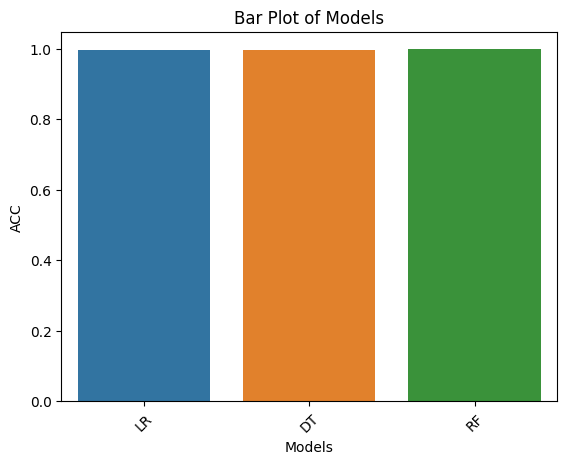

In [96]:
sns.barplot(x='Models',y='ACC' ,data=final_data)
plt.xlabel('Models')
plt.ylabel('ACC')
plt.title('Bar Plot of Models')
plt.xticks(rotation=45)
plt.show()

In [99]:
final_data_p=pd.DataFrame({'Models':['LR','DT','RF'],
                        'PRE':[precision_score(y_test,y_pred,zero_division=1),
                               precision_score(y_test,y_pred1),
                               precision_score(y_test,y_pred2)
                               ]})

In [100]:
final_data_p

,Models,PRE
0,LR,1.000000
1,DT,0.500000
2,RF,0.882353


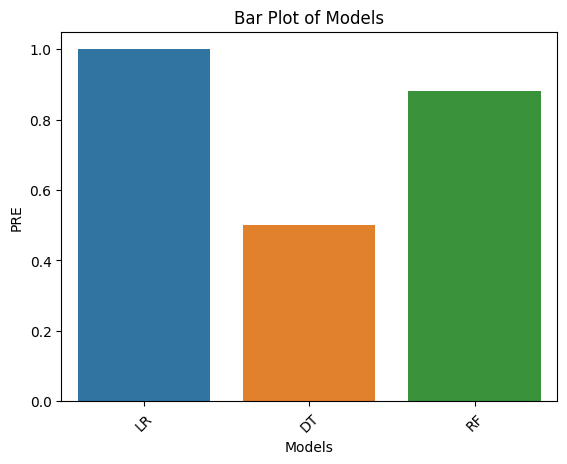

In [101]:
sns.barplot(x='Models',y='PRE' ,data=final_data_p)
plt.xlabel('Models')
plt.ylabel('PRE')
plt.title('Bar Plot of Models')
plt.xticks(rotation=45)
plt.show()

# Save The Model

In [103]:
import joblib

In [106]:
joblib.dump(model,'churn_predict_model')

['churn_predict_model']

In [107]:
model1=joblib.load('churn_predict_model')

In [110]:
features

['amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long']

In [133]:
model1.predict(test_df)

array([0., 0., 0., ..., 0., 0., 0.])